# Imports

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import ngrams
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
article1 = "Article1.txt"
with open (article1, encoding='UTF8') as f:
#     data = myfile.read().splitlines()
    contents = f.read().splitlines()

contents

['Citizens of Russia, friends,',
 '',
 'I consider it necessary today to speak again about the tragic events in Donbass and the key aspects of ensuring the security of Russia.',
 '',
 'I will begin with what I said in my address on February 21, 2022. I spoke about our biggest concerns and worries, and about the fundamental threats which irresponsible Western politicians created for Russia consistently, rudely and unceremoniously from year to year. I am referring to the eastward expansion of NATO, which is moving its military infrastructure ever closer to the Russian border.',
 '',
 'It is a fact that over the past 30 years we have been patiently trying to come to an agreement with the leading NATO countries regarding the principles of equal and indivisible security in Europe. In response to our proposals, we invariably faced either cynical deception and lies or attempts at pressure and blackmail, while the North Atlantic alliance continued to expand despite our protests and concerns. I

In [7]:
df_putin = pd.read_csv(article1, sep="\t",  header=None, names=['ideas'])
display(df_putin.head())
print("Total number of ideas", len(df_putin))

ideas
0                       Citizens of Russia, friends,
1  I consider it necessary today to speak again a...
2  I will begin with what I said in my address on...
3  It is a fact that over the past 30 years we ha...
4  Why is this happening? Where did this insolent...

Total number of ideas 62


Total number of ideas 62


In [8]:
try:
    import wordcloud
except ModuleNotFoundError:
    !pip install wordcloud


def show_wordcloud(df, title, col):
    text = ' '.join(df[col].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,
        max_font_size=100, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud, interpolation="bilinear")  
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

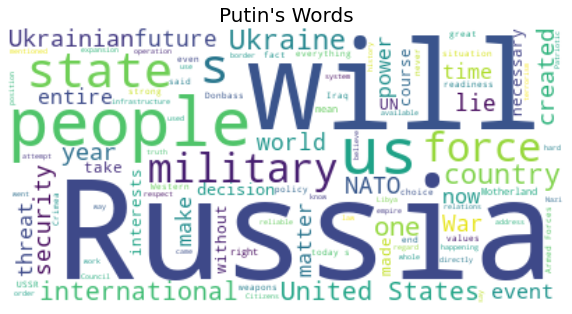

In [11]:
show_wordcloud(df_putin, "Putin's Words", col='ideas')

In [28]:
from sklearn.feature_extraction import _stop_words
import string
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
!pip install stopwords
from stopwords import get_stopwords

[nltk_data] Downloading package wordnet to
[nltk_data]     /zhome/48/e/160183/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /zhome/48/e/160183/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
lemmatizer = WordNetLemmatizer()
stop_words = get_stopwords('en')
# len(stop_words)
Stop_Words = _stop_words.ENGLISH_STOP_WORDS
len(Stop_Words)

318

Text preprocessing

In [36]:
from nltk.tokenize import RegexpTokenizer

def text_processing(text):
    # remove punctuation
    text = "".join([c for c in text if c not in string.punctuation])
#     no_punc_txt = sentence.translate(sentence.maketrans('', '', string.punctuation))
    # lowercase
    text = "".join(c.lower() for c in text)
    # remove stopwords
    text = " ".join([w for w in text.split() if w not in Stop_Words])
    # stemming / lematizing (optional)
    text = " ".join([lemmatizer.lemmatize(w) for w in text.split()])
    return text
#     df_putin['clean_ideas'] = 
df_putin['ideas_clean']  = df_putin['ideas'].apply(lambda row: text_processing(row))

In [35]:
# tokenize words while ignoring punctutation
# tokenizer = RegexpTokenizer(r'\w+')
# text = df_putin['ideas'].loc[0]
# text = tokenizer.tokenize(text)
# text

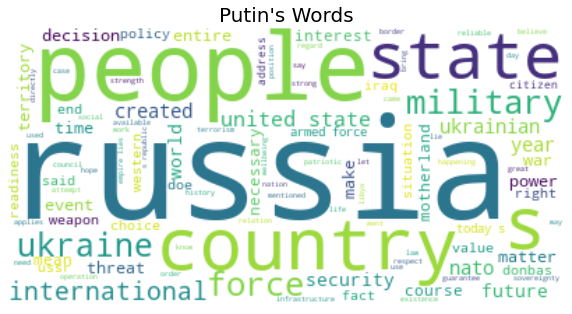

In [37]:
show_wordcloud(df_putin, "Putin's Words", 'ideas_clean')

In [124]:
index_to_word = {v: k for k, v in count_vect.vocabulary_.items()}
# index_to_word

In [125]:
word_freq = sorted(index_to_word.items(), key=lambda item:item[0], reverse=True)
word_freq

[(929, 'zone'),
 (928, 'yes'),
 (927, 'year'),
 (926, 'wwii'),
 (925, 'write'),
 (924, 'wound'),
 (923, 'worse'),
 (922, 'worry'),
 (921, 'worried'),
 (920, 'world'),
 (919, 'work'),
 (918, 'word'),
 (917, 'witnessed'),
 (916, 'winner'),
 (915, 'wholly'),
 (914, 'white'),
 (913, 'western'),
 (912, 'west'),
 (911, 'went'),
 (910, 'wellbeing'),
 (909, 'week'),
 (908, 'weapon'),
 (907, 'weaker'),
 (906, 'way'),
 (905, 'warfare'),
 (904, 'war'),
 (903, 'want'),
 (902, 'waiting'),
 (901, 'waged'),
 (900, 'vortex'),
 (899, 'voiced'),
 (898, 'vital'),
 (897, 'vii'),
 (896, 'view'),
 (895, 'victim'),
 (894, 'vial'),
 (893, 'viability'),
 (892, 'veritable'),
 (891, 'vast'),
 (890, 'value'),
 (889, 'vain'),
 (888, 'utterly'),
 (887, 'ussr'),
 (886, 'useless'),
 (885, 'useful'),
 (884, 'used'),
 (883, 'use'),
 (882, 'urgent'),
 (881, 'urge'),
 (880, 'upsurge'),
 (879, 'unprecedented'),
 (878, 'united'),
 (877, 'unit'),
 (876, 'union'),
 (875, 'unilateral'),
 (874, 'unfold'),
 (873, 'undoubtedly')

In [121]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer= TfidfTransformer()
bow_tfidf = tf_transformer.fit_transform(bow_counts)
print(bow_tfidf[0])

for b_tfidf, text in zip(bow_tfidf, df_putin['clean_ideas']):
    print(index_to_word[np.argmax(b_tfidf)], "-->", text)

  (0, 726)	0.3036453799440582
  (0, 364)	0.7461459017032308
  (0, 145)	0.5925080392788785


# Topic Modelling

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
bow_counts = count_vect.fit_transform(df_putin['ideas_clean'].values)

In [44]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5, learning_method='online',
                                learning_offset=50., random_state=0)
lda.fit(bow_counts)

LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, n_components=5, random_state=0)

In [45]:
topics = lda.transform(bow_counts)
for i in range(n_topics):
    topic = 'LDA_topic' + str(i+1)
    df_putin[topic] = topics[:,i]

In [47]:
df_putin[df_putin['LDA_topic1'] > 0.7]

ideas  \
2   I will begin with what I said in my address on...   
3   It is a fact that over the past 30 years we ha...   
10  Then came the turn of Iraq, Libya and Syria. T...   
20  As a result, the country was not prepared to c...   
37  It is not our plan to occupy the Ukrainian ter...   
38  The outcomes of World War II and the sacrifice...   
42  I reiterate: we are acting to defend ourselves...   
44                                  Comrade officers,   
50  We always need to be strong, but this strength...   
51  We all know that having justice and truth on o...   
56  We always need to be strong, but this strength...   
57  We all know that having justice and truth on o...   
61  I believe in your support and the invincible f...   

                                          clean_ideas  \
2   begin said address february 21 2022 spoke bigg...   
3   fact past 30 year patiently trying come agreem...   
10  came turn iraq libya syria illegal use militar...   
20  result country prepared counter invasion nazi ...   
37  plan occupy ukrainian territory intend impose ...   
38  outcome world war ii sacrifice people make def...   
42  reiterate acting defend threat created worse p...   
44                                    comrade officer   
50  need strong strength different form “empire li...   
51  know having justice truth make truly strong ca...   
56  need strong strength different form “empire li...   
57  know having justice truth make truly strong ca...   
61  believe support invincible force rooted love f...   

                                          ideas_clean  LDA_topic1  LDA_topic2  \
2   begin said address february 21 2022 spoke bigg...    0.975257    0.006160   
3   fact past 30 year patiently trying come agreem...    0.980589    0.004855   
10  came turn iraq libya syria illegal use militar...    0.983015    0.004242   
20  result country prepared counter invasion nazi ...    0.984015    0.003995   
37  plan occupy ukrainian territory intend impose ...    0.971901    0.007014   
38  outcome world war ii sacrifice people make def...    0.973700    0.006569   
42  reiterate acting defend threat created worse p...    0.979056    0.005222   
44                                    comrade officer    0.728105    0.067841   
50  need strong strength different form “empire li...    0.963156    0.009202   
51  know having justice truth make truly strong ca...    0.969967    0.007500   
56  need strong strength different form “empire li...    0.963156    0.009202   
57  know having justice truth make truly strong ca...    0.969967    0.007500   
61  believe support invincible force rooted love f...    0.898258    0.025405   

    LDA_topic3  LDA_topic4  LDA_topic5  
2     0.006181    0.006244    0.006158  
3     0.004842    0.004868    0.004846  
10    0.004257    0.004256    0.004230  
20    0.004010    0.003999    0.003980  
37    0.007024    0.007049    0.007012  
38    0.006568    0.006599    0.006565  
42    0.005249    0.005244    0.005229  
44    0.067809    0.068553    0.067692  
50    0.009230    0.009211    0.009201  
51    0.007519    0.007508    0.007506  
56    0.009230    0.009211    0.009201  
57    0.007519    0.007508    0.007506  
61    0.025429    0.025512    0.025395

### Top words per LDA Topic

In [49]:
#print top N words together with their weights in each topic
def print_top_words(model, feature_names, n_top_words):
    norm = model.components_.sum(axis=1)[:, np.newaxis]
    for topic_idx, topic in enumerate(model.components_):
        print(80 * "-")
        print("Topic {}".format(topic_idx+1))
        for i in topic.argsort()[:-n_top_words - 1:-1]:
            print("{:.3f}".format(topic[i] / norm[topic_idx][0]) 
                  + '\t' + feature_names[i])

print("\nTopics in LDA model:")
counts_feature_names = count_vect.get_feature_names()
n_top_words = 10
print_top_words(lda, counts_feature_names, n_top_words)



Topics in LDA model:
--------------------------------------------------------------------------------
Topic 1
0.003	year
0.003	war
0.002	make
0.002	force
0.002	libya
0.002	strong
0.002	need
0.002	created
0.002	border
0.002	strength
--------------------------------------------------------------------------------
Topic 2
0.002	weapon
0.002	iraq
0.002	state
0.002	country
0.002	military
0.002	directly
0.002	destruction
0.002	urge
0.002	force
0.002	happen
--------------------------------------------------------------------------------
Topic 3
0.003	state
0.003	people
0.003	russia
0.003	military
0.003	united
0.002	matter
0.002	say
0.002	power
0.002	country
0.002	threat
--------------------------------------------------------------------------------
Topic 4
0.009	russia
0.005	people
0.003	state
0.003	ukraine
0.003	today
0.003	nato
0.002	international
0.002	force
0.002	donbas
0.002	territory
--------------------------------------------------------------------------------
Topic 5
0.002	year
0.

# Exploration

In [113]:
# with open (article1, encoding='UTF8') as f:
#     contents = f.read().splitlines()
contents = open(article1)
contents

<_io.TextIOWrapper name='Article1.txt' mode='r' encoding='UTF-8'>

In [114]:
contents = [document.strip() for document in contents]
contents = [document for document in contents if len(document)]

In [115]:
from nltk.tokenize import word_tokenize

print("contents[0] ", contents[0])

text_processed = text_processing(contents[0])
print("text_processed", text_processed)

contents = [text_processing(document) for document in contents]
contents = [word_tokenize(document) for document in contents]

print("word_tokenize(text_processed)", word_tokenize(text_processed))
contents

contents[0]  Citizens of Russia, friends,
text_processed citizen russia friend
word_tokenize(text_processed) ['citizen', 'russia', 'friend']


[['citizen', 'russia', 'friend'],
 ['consider',
  'necessary',
  'today',
  'speak',
  'tragic',
  'event',
  'donbas',
  'key',
  'aspect',
  'ensuring',
  'security',
  'russia'],
 ['begin',
  'said',
  'address',
  'february',
  '21',
  '2022',
  'spoke',
  'biggest',
  'concern',
  'worry',
  'fundamental',
  'threat',
  'irresponsible',
  'western',
  'politician',
  'created',
  'russia',
  'consistently',
  'rudely',
  'unceremoniously',
  'year',
  'year',
  'referring',
  'eastward',
  'expansion',
  'nato',
  'moving',
  'military',
  'infrastructure',
  'closer',
  'russian',
  'border'],
 ['fact',
  'past',
  '30',
  'year',
  'patiently',
  'trying',
  'come',
  'agreement',
  'leading',
  'nato',
  'country',
  'regarding',
  'principle',
  'equal',
  'indivisible',
  'security',
  'europe',
  'response',
  'proposal',
  'invariably',
  'faced',
  'cynical',
  'deception',
  'lie',
  'attempt',
  'pressure',
  'blackmail',
  'north',
  'atlantic',
  'alliance',
  'continu

In [116]:
words = [word for tokenized_words in contents for word in tokenized_words]
print(len(words))
words = [text_processing(w) for w in words]
print(len(words))

# print(words)
# word_freq = []
word_freq = {}

for w in words:
    word_freq[w] = words.count(w)
#     word_freq.append({f"{w}": words.count(w)})
    
word_freq = sorted(word_freq.items(), key=lambda item:item[1], reverse=True)
word_freq

1888
1888


[('russia', 35),
 ('people', 27),
 ('’', 24),
 ('state', 23),
 ('s', 23),
 ('force', 17),
 ('country', 14),
 ('military', 12),
 ('ukraine', 11),
 ('', 10),
 ('international', 10),
 ('war', 10),
 ('united', 10),
 ('created', 9),
 ('year', 9),
 ('nato', 9),
 ('ukrainian', 9),
 ('today', 8),
 ('security', 8),
 ('lie', 8),
 ('world', 8),
 ('“', 8),
 ('”', 8),
 ('future', 8),
 ('event', 7),
 ('threat', 7),
 ('did', 7),
 ('power', 7),
 ('time', 7),
 ('entire', 7),
 ('decision', 7),
 ('matter', 7),
 ('make', 7),
 ('territory', 7),
 ('necessary', 6),
 ('mean', 6),
 ('course', 6),
 ('motherland', 6),
 ('donbas', 5),
 ('said', 5),
 ('western', 5),
 ('fact', 5),
 ('doe', 5),
 ('situation', 5),
 ('iraq', 5),
 ('weapon', 5),
 ('ussr', 5),
 ('readiness', 5),
 ('value', 5),
 ('end', 5),
 ('right', 5),
 ('policy', 5),
 ('armed', 5),
 ('crimea', 5),
 ('choice', 5),
 ('citizen', 4),
 ('address', 4),
 ('infrastructure', 4),
 ('border', 4),
 ('attempt', 4),
 ('happening', 4),
 ('soviet', 4),
 ('regard', 4

In [117]:
df = pd.read_csv(article1, sep="\t",  header=None, names=['ideas'])
df

ideas
0                        Citizens of Russia, friends,
1   I consider it necessary today to speak again a...
2   I will begin with what I said in my address on...
3   It is a fact that over the past 30 years we ha...
4   Why is this happening? Where did this insolent...
..                                                ...
57  We all know that having justice and truth on o...
58                                  Dear compatriots,
59  I am certain that devoted soldiers and officer...
60  At the end of the day, the future of Russia is...
61  I believe in your support and the invincible f...

[62 rows x 1 columns]